In [1]:
# time to rev up those fryers and import those necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # in case we need to scale numeric data
from sklearn.metrics import mean_squared_error, r2_score # for evaluating model performance

In [5]:
# reading the file out
file_path = "C:/Users/stanl/Downloads/serie_a_standings.csv"
df = pd.read_csv(file_path)
df.head()

,Team,MatchesPlayed,Wins,Draws,Losses,GoalsFor,GoalsAgainst,xG,xGA,GoalDifference,Points,FormScore
0,Atalanta,15,11,1,3,26,23,15.28,24.43,3,34,13
1,Napoli,14,10,2,2,21,9,20.41,12.65,12,32,0
2,Inter,14,9,4,1,34,15,31.28,15.52,19,31,0
3,Fiorentina,13,8,4,1,27,10,23.84,14.34,17,28,0
4,Lazio,14,9,1,4,29,17,29.17,13.35,12,28,0


In [7]:
# checking for missing data
missing_entries = df.isnull().sum()
missing_entries

Team              0
MatchesPlayed     0
Wins              0
Draws             0
Losses            0
GoalsFor          0
GoalsAgainst      0
xG                0
xGA               0
GoalDifference    0
Points            0
FormScore         0
dtype: int64

In [9]:
#dropping form score, could i incorporate it with the actual data? yes. will i? nah...it wasn't on the understat.com table
df.drop(columns=["FormScore"], inplace=True)
df.head()

,Team,MatchesPlayed,Wins,Draws,Losses,GoalsFor,GoalsAgainst,xG,xGA,GoalDifference,Points
0,Atalanta,15,11,1,3,26,23,15.28,24.43,3,34
1,Napoli,14,10,2,2,21,9,20.41,12.65,12,32
2,Inter,14,9,4,1,34,15,31.28,15.52,19,31
3,Fiorentina,13,8,4,1,27,10,23.84,14.34,17,28
4,Lazio,14,9,1,4,29,17,29.17,13.35,12,28


In [13]:
#dropping target columns
X = df.drop(columns=['Points'])
y = df['Points']

In [15]:
# I want to encode the 'Team' feature, would feel sorta cruel to drop it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Team'] = le.fit_transform(X['Team'])

In [17]:
#now, let's look at how the features correlate
correlation_matrix = X.corr()
print(correlation_matrix)

                    Team  MatchesPlayed      Wins     Draws    Losses  \
Team            1.000000       0.155738 -0.255229 -0.344572  0.567006   
MatchesPlayed   0.155738       1.000000 -0.136122  0.186186  0.180440   
Wins           -0.255229      -0.136122  1.000000 -0.427852 -0.677540   
Draws          -0.344572       0.186186 -0.427852  1.000000 -0.351722   
Losses          0.567006       0.180440 -0.677540 -0.351722  1.000000   
GoalsFor       -0.264636      -0.183602  0.823064 -0.195816 -0.699291   
GoalsAgainst    0.277127       0.304580 -0.499215 -0.337366  0.834324   
xG             -0.233367      -0.212444  0.542532 -0.091223 -0.509780   
xGA             0.283148       0.433462 -0.535577 -0.189805  0.775555   
GoalDifference -0.316641      -0.282249  0.782756  0.067878 -0.893549   

                GoalsFor  GoalsAgainst        xG       xGA  GoalDifference  
Team           -0.264636      0.277127 -0.233367  0.283148       -0.316641  
MatchesPlayed  -0.183602      0.304580 -0.

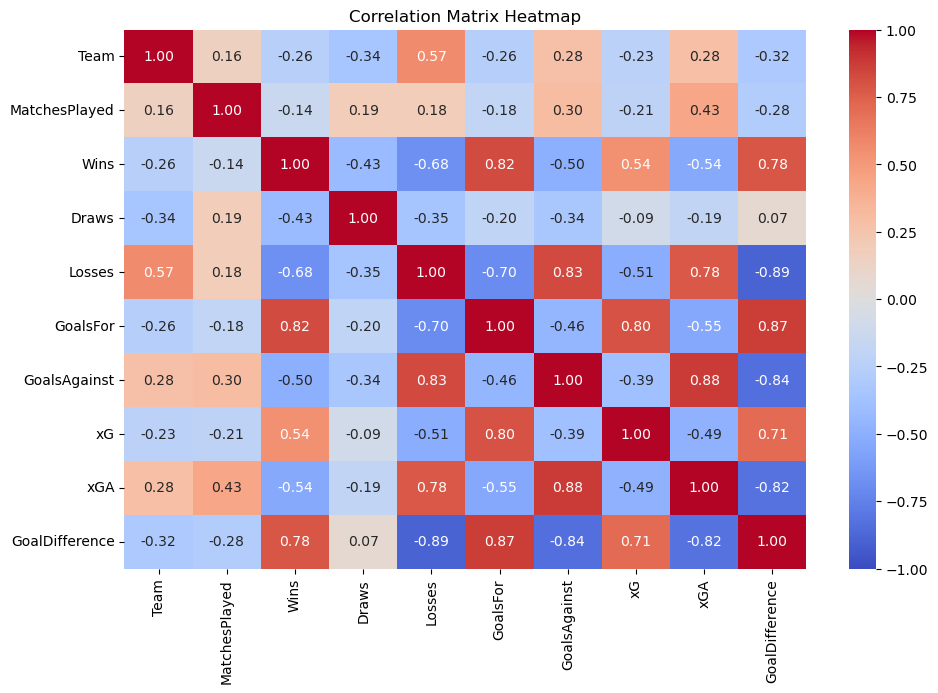

In [19]:
#visualizing the correlation
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [23]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#setting up the xgboost model
import xgboost as xgb
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
# fitting the xgboost model to the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [29]:
# Predict the target variable (Points) on the test set
y_pred = model.predict(X_test)

In [31]:
# Calculate the Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
#printing out the evaluation metruic scores
print(f"mean squared error: {mse}")
print(f"r-squared: {r2}")

mean squared error: 78.20415897601492
r-squared: 0.29704123735427856


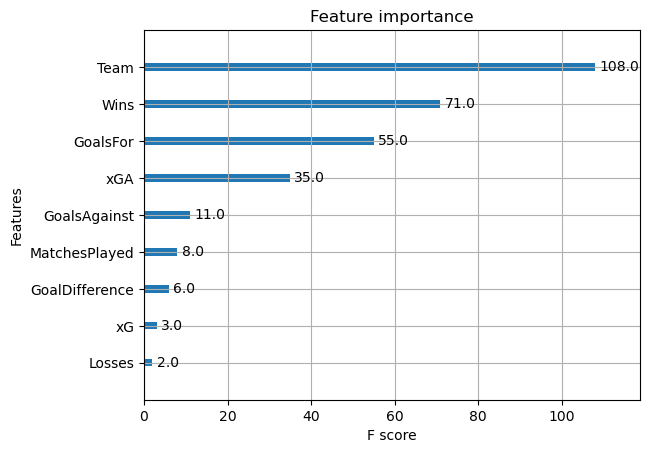

In [35]:
# Plot feature importance
xgb.plot_importance(model)
plt.show()

In [37]:
# so by beginning to look at the next 23 games, cus there are 38 games total
remaining_games = 23
# Predict points for the next 23 games for all teams (using model.predict)
predicted_points_for_remaining_games = model.predict(X)  # This gives predicted points for each team based on current features

In [39]:
#Adding the predicted points for the remaining games to the current points
df['Predicted_Final_Points'] = df['Points'] + (predicted_points_for_remaining_games * remaining_games / 15)

In [41]:
#Sorting the teams based on the final predicted points
df_sorted = df.sort_values(by='Predicted_Final_Points', ascending=False)

In [43]:
#and finally, showing the final predicted standings (after 38 games)
df_sorted[['Team', 'Predicted_Final_Points']]

,Team,Predicted_Final_Points
2,Inter,78.531410
1,Napoli,74.933044
3,Fiorentina,70.933044
4,Lazio,70.933044
5,Juventus,68.400082
0,Atalanta,59.909449
6,AC Milan,55.733353
7,Bologna,55.733353
8,Udinese,43.066460
10,Torino,40.533627
